In [1]:
import torch
import fastai

In [2]:
torch.cuda.is_available()

True

In [3]:
from fastai.vision.all import *
import numpy as np

path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/labels')]

In [ ]:
!ls /root/.fastai/data/camvid_tiny/labels

In [ ]:
!ls /root/.fastai/data/camvid_tiny/images

In [4]:
# label getter funksiya
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'

In [5]:
# dataloaders
dls = SegmentationDataLoaders.from_label_func(path,
                                              bs=8,
                                              fnames=get_image_files(path/'images'),
                                              label_func= label_getter,
                                              codes=np.loadtxt(path/'codes.txt', dtype=str))

In [6]:
#  fine-tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 53.0MB/s]


epoch,train_loss,valid_loss,time
0,3.332345,2.463542,00:02


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,time
0,1.982149,1.831254,00:01
1,1.703059,1.325367,00:01
2,1.514288,1.287609,00:01
3,1.381028,1.082206,00:01
4,1.254429,0.927885,00:01
5,1.133578,0.772945,00:01
6,1.026563,0.722564,00:01
7,0.931176,0.708332,00:01
8,0.850334,0.666412,00:01
9,0.781938,0.657890,00:01


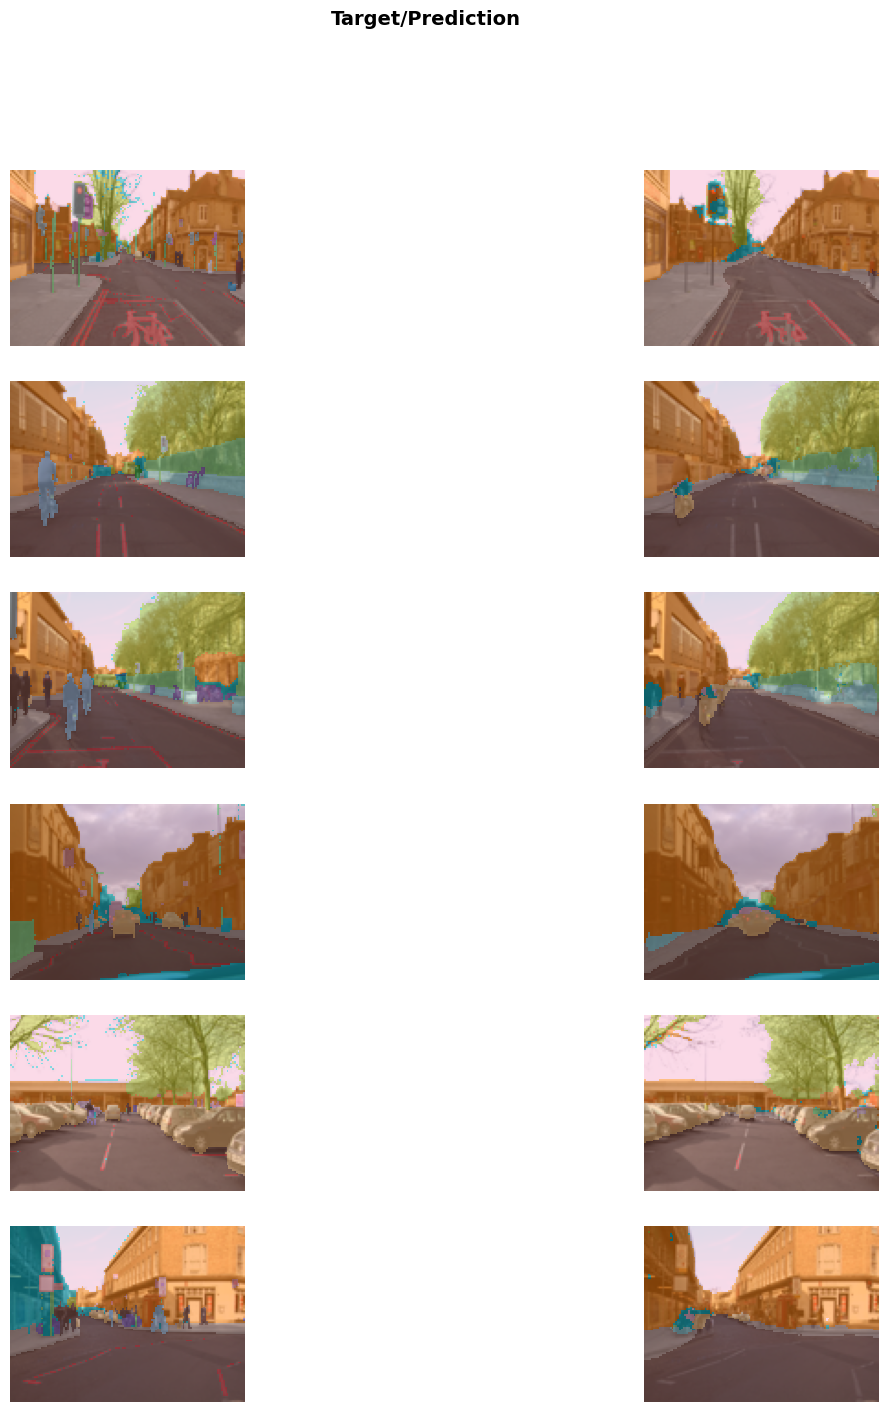

In [7]:
learn.show_results(max_n=6, figsize=(15, 16))